In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [18]:
# data = sm.datasets.macrodata.load_pandas().data
data = pd.read_csv('./csv/merge.csv')
data.head()

,Date,Gold,REMX,AAPL,TSMC,USD/KRW
0,2020-05-01,1728.6,29.93,72.27,51.10,1224.89
1,2020-05-04,1748.5,29.89,73.29,52.15,1224.14
2,2020-05-05,1751.3,31.01,74.39,51.71,1222.47
3,2020-05-06,1729.2,31.07,75.16,52.13,1228.55
4,2020-05-07,1768.6,31.08,75.93,52.33,1219.61


In [19]:
mydata = data[["Gold", 'USD/KRW']]
mydata.index = data["Date"]
mydata.head()

,Gold,USD/KRW
Date,,
2020-05-01,1728.6,1224.89
2020-05-04,1748.5,1224.14
2020-05-05,1751.3,1222.47
2020-05-06,1729.2,1228.55
2020-05-07,1768.6,1219.61


<AxesSubplot:xlabel='Date'>

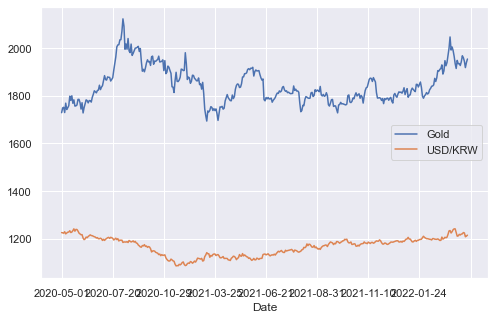

In [20]:
mydata.plot(figsize = (8,5))

In [21]:
adfuller_test = adfuller(mydata[["Gold"]], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -2.737063357947369
p-value: 0.067841329316604


In [22]:
adfuller_test = adfuller(mydata[["Gold"]], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -2.737063357947369
p-value: 0.067841329316604


In [23]:
mydata_diff = mydata.diff().dropna()


In [24]:
adfuller_test = adfuller(mydata_diff['Gold'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -15.510907056186225
p-value: 2.3492986797838897e-28


In [25]:
adfuller_test = adfuller(mydata_diff['Gold'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -15.510907056186225
p-value: 2.3492986797838897e-28


In [26]:
# 모델링

train = mydata_diff.iloc[:-10,:]
test = mydata_diff.iloc[-10:,:]

In [27]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


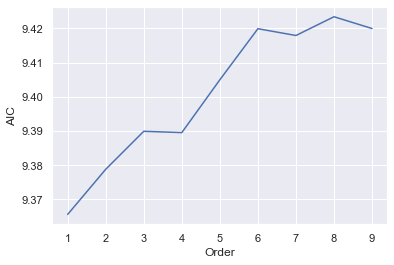

In [28]:
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [29]:
results = forecasting_model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 29, Apr, 2022
Time:                     16:45:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.48149
Nobs:                     385.000    HQIC:                   9.41953
Log likelihood:          -2888.00    FPE:                    11834.9
AIC:                      9.37880    Det(Omega_mle):         11533.4
--------------------------------------------------------------------
Results for equation Gold
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.562490         1.069039            0.526           0.599
L1.Gold           -0.068468         0.052169           -1.312           0.189
L1.USD/KRW        -0.230896         0.212192           -1.088           0

In [30]:
# 예측하기

laaged_values = train.values[-2:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realgdp_1d', 'realdpi_1d'])
forecast

,realgdp_1d,realdpi_1d
Date,,
2022-03-18,-1.588635,-0.199766
2022-03-21,-6.122854,0.472090
2022-03-22,0.910567,0.028202
2022-03-23,1.019428,-0.123467
2022-03-24,0.473105,-0.032779
2022-03-25,0.436401,-0.025544
2022-03-28,0.499012,-0.032209
2022-03-29,0.500764,-0.033424
2022-03-30,0.494985,-0.032623


In [32]:
mydata

,Gold,USD/KRW
Date,,
2020-05-01,1728.6,1224.89
2020-05-04,1748.5,1224.14
2020-05-05,1751.3,1222.47
2020-05-06,1729.2,1228.55
2020-05-07,1768.6,1219.61
...,...,...
2022-03-25,1959.8,1225.08
2022-03-28,1944.7,1223.65
2022-03-29,1918.0,1207.35


In [31]:
forecast["realgdp_forecasted"] = mydata["Gold"].iloc[-10-1] + forecast['Gold'].cumsum()
forecast["realdpi_forecasted"] = mydata["USD/KRW"].iloc[-10-1] + forecast['realdpi_1d'].cumsum() 
forecast

KeyError: 'realgdp'

In [ ]:
test = mydata.iloc[-10:,:]
test["realgdp_forecasted"] = forecast["realgdp_forecasted"]
test["realdpi_forecasted"] = forecast["realdpi_forecasted"]
test.plot()

KeyError: 'realgdp_forecasted'